# Discussion 11: Neural Networks

This notebook is an introduction to PyTorch. We are going to cover the following topics:

- Tensor Operations
- Data Loading 
- Loss functions
- Model definition and training

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np

## Tensor Operations

In PyTorch, tensors are the fundamental data structure used to represent data and model parameters. Tensors are similar to NumPy arrays but can be run on GPUs for faster computation. They support various mathematical operations like addition, multiplication, matrix operations, and more. These operations are essential for implementing neural networks and performing gradient-based optimization.

### Basics - creation and manipulation

In [55]:
tensor1 = torch.tensor([1.0, 2.0, 3.0])
tensor2 = torch.ones((2, 3))
tensor3 = torch.zeros((3, 3))

print(tensor1, tensor1.shape)
print(tensor2, tensor2.shape)
print(tensor3, tensor3.shape)

tensor([1., 2., 3.]) torch.Size([3])
tensor([[1., 1., 1.],
        [1., 1., 1.]]) torch.Size([2, 3])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) torch.Size([3, 3])


In [56]:
added_tensor = tensor1 + tensor1
multiplied_tensor = tensor1 * 2

print(added_tensor, added_tensor.shape)
print(multiplied_tensor, multiplied_tensor.shape)

print()

# Matrix multiplication
matrix1 = torch.rand((3, 3))
matrix2 = torch.rand((3, 3))
result = torch.matmul(matrix1, matrix2)

print(result, result.shape)

tensor([2., 4., 6.]) torch.Size([3])
tensor([2., 4., 6.]) torch.Size([3])

tensor([[0.6124, 1.3634, 0.8993],
        [0.2750, 0.9861, 0.4405],
        [0.2071, 0.1963, 0.2277]]) torch.Size([3, 3])


You can generate tensors of the same size as others, using the `torch_*like` methods. 

In [57]:
x = torch.empty(2, 2, 3)
print(x.shape)
print(x)

print("Zeros like x:")
zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

print("Ones like x:")
ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

print("Random like x:")
rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)

torch.Size([2, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
Zeros like x:
torch.Size([2, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
Ones like x:
torch.Size([2, 2, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])
Random like x:
torch.Size([2, 2, 3])
tensor([[[0.9037, 0.9555, 0.1035],
         [0.6258, 0.2849, 0.4452]],

        [[0.1258, 0.9554, 0.1330],
         [0.7672, 0.6757, 0.6625]]])


### Manipulating tensor shapes

In [58]:
md_tensor = torch.rand((2, 3, 4))
print(md_tensor, md_tensor.shape)

print()

reshaped_tensor = md_tensor.reshape(2, 12)
print(reshaped_tensor, reshaped_tensor.shape)

tensor([[[0.2297, 0.9545, 0.6099, 0.5643],
         [0.0594, 0.7099, 0.4250, 0.2709],
         [0.9295, 0.6115, 0.2234, 0.2469]],

        [[0.4761, 0.7792, 0.3722, 0.2147],
         [0.3288, 0.1265, 0.6783, 0.8870],
         [0.0293, 0.6161, 0.7583, 0.5907]]]) torch.Size([2, 3, 4])

tensor([[0.2297, 0.9545, 0.6099, 0.5643, 0.0594, 0.7099, 0.4250, 0.2709, 0.9295,
         0.6115, 0.2234, 0.2469],
        [0.4761, 0.7792, 0.3722, 0.2147, 0.3288, 0.1265, 0.6783, 0.8870, 0.0293,
         0.6161, 0.7583, 0.5907]]) torch.Size([2, 12])


In [59]:
a = torch.rand(3, 226, 226)
b = a.unsqueeze(0)

print(a.shape)
print(b.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


In [60]:
a = torch.rand(1, 20)
print(a.shape)
print(a)

b = a.squeeze(0)
print(b.shape)
print(b)

c = torch.rand(2, 2)
print(c.shape)

d = c.squeeze(0)
print(d.shape)

torch.Size([1, 20])
tensor([[0.5375, 0.0375, 0.0679, 0.7464, 0.4228, 0.0627, 0.9277, 0.3241, 0.0866,
         0.0619, 0.5990, 0.1895, 0.0684, 0.7237, 0.4025, 0.9298, 0.1692, 0.7894,
         0.4959, 0.8418]])
torch.Size([20])
tensor([0.5375, 0.0375, 0.0679, 0.7464, 0.4228, 0.0627, 0.9277, 0.3241, 0.0866,
        0.0619, 0.5990, 0.1895, 0.0684, 0.7237, 0.4025, 0.9298, 0.1692, 0.7894,
        0.4959, 0.8418])
torch.Size([2, 2])
torch.Size([2, 2])


### Gradient Calculation

In [61]:
x = torch.tensor(4.0, requires_grad=True)
y = x ** 2
print(x)
print(y)
y.backward()
print(x.grad)

tensor(4., requires_grad=True)
tensor(16., grad_fn=<PowBackward0>)
tensor(8.)


## Dataloading

PyTorch contains a set of modules that support comprehensive data loading and manipulation for images, text, even audio and video. These are usually in the `torch.utils` and `torchvision` libraries. 

In this section, we will use a dataset on [breast cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) from sklearn. We will appropriate it to a [PyTorch Dataset](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) for model training later. The feature we'll be predicting is called `target`.

In [62]:
from torch.utils.data import Dataset, DataLoader, random_split

# torchvision imports
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid

from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer(as_frame=True)

# Get a description of the datasetb
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [63]:
# X is a Pandas dataframe
# The columns are the features
X = dataset.data
# y is a Pandas series with the target class labels (0 - malignant, 1 - benign)
y = dataset.target

print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [65]:
y.tail()

564    0
565    0
566    0
567    0
568    1
Name: target, dtype: int64

#### Dataset class

The dataset class retrieves the dataset's features and labels one sample at a time. To create your own instance from this class you must overload the three methods:

- `__init__(self, params)`, which runs functions when the Dataset object is created
- `__len__(self)`, which returns the number of samples in the dataset
- `__getitem__(self, index)`, which returns a sample from the dataset at a given index

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Using the train_test_split method we split 80% of the data into the X_train, y_train numpy arrays
# The remaining 20% is our X_test and y_test
X_train, X_test, y_train, y_test = train_test_split(
    X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=10)

# Create a StandardScaler object
sc = StandardScaler()

# The StandardScaler standardizes features by removing the mean and scaling to unit variance
# Prevents features with larger variances to dominate
# We only need to apply this to our training/testing input data since the output is binary 0/1
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# Create a dataset class called WisconsinDataset
class WisconsinDataset(Dataset):
  def __init__(self, X_train, y_train):
    # need to convert float64 to float32
    self.X = torch.from_numpy(X_train.astype(np.float32))
    # Need to convert int64 to float32 and use the
    # unsqueeze function to create an output vector with appropriate dimensions
    self.y = torch.from_numpy(y_train.astype(np.float32)).unsqueeze(1)
    self.len = self.X.shape[0]

  def __len__(self):
    return self.len

  def __getitem__(self, index):
    return self.X[index], self.y[index]
  
# Instantiate the training data
traindata = WisconsinDataset(X_train, y_train)

print(traindata[0])
print(len(traindata))

(tensor([ 1.7744,  2.3593,  1.9123,  1.6607,  1.4866,  3.2222,  3.2600,  2.5807,
         2.1916,  1.0366,  1.0894,  0.7254,  1.3450,  0.9398, -0.1815,  2.0656,
         1.6833,  0.7815,  0.3781,  0.9643,  1.9131,  2.2777,  2.2400,  1.6101,
         1.4341,  3.8546,  3.2018,  2.2533,  2.0322,  2.2009]), tensor([0.]))
455


#### Dataloader class

The DataLoader class is an iterable object that abstracts the complex data passing process from the dataset to the model. It passes samples in minibatches. It can reshuffle the data at every epoch to reduce model overfitting. It uses Python’s multiprocessing to speed up data retrieval.

In [67]:
batch_size = 4
trainloader = DataLoader(traindata, batch_size=batch_size)

#### Module class 

The torch `nn.Module` class is how to implement a specific model. If you are creating a neural network model from scratch, this is where you will define the model architecture. You only need to overload the following two methods:

- `__init__(self)`, which sets up the architecture
- `forward(self, x)`, which defines the forward propagation.

You can also define other methods in this class. For instance you could create functions to take train/validate/test the model.

For details on the kinds of layers you can create, see the documentation on the `torch.nn` class:

https://pytorch.org/docs/stable/nn.html

For details on the kinds of activation functions you can use, see:

https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

In [68]:
# Set the number of features (len of X cols)
input_dim = X_train.shape[1]

print(f"Number of features: {input_dim}")

# Set the number of hidden layers
hidden_layer_dim = 4

# Set the number of classes
output_dim = 1

Number of features: 30


In [69]:
# Define the Neural Network class
class NeuralNetwork(torch.nn.Module):
    def __init__(self, input_dim, hidden_layer_dim, output_dim):
        super(NeuralNetwork, self).__init__()

        self.linear1 = nn.Linear(input_dim, hidden_layer_dim) # One hidden layer going from 30 to 4
        self.linear2 = nn.Linear(hidden_layer_dim, output_dim) # One output layer going from 4 to 1

    def forward(self, x):
        x = torch.relu(self.linear1(x)) # ReLU activation function
        x = torch.sigmoid(self.linear2(x)) # Sigmoid activation function - because we are doing binary classification (class probability)
        return x

In [70]:
# Set a random seed for reproducibility
torch.manual_seed(42)

# Instantiate the Neural Network class
clf = NeuralNetwork(input_dim, hidden_layer_dim, output_dim)

# Print out details about the layers of the model
print(clf.parameters)

<bound method Module.parameters of NeuralNetwork(
  (linear1): Linear(in_features=30, out_features=4, bias=True)
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)>


In [71]:
# Access the layers of a model

# Output the parameters of the model and store them in a list
[w, b] = clf.linear1.parameters()

# Print the weights of layer 1, this object is a tuple with
print(w)

# Print the biases in layer 1
print(b)

print("Type of w: ", type(w))

# To access the tensor data we use the .data attribute
print(w.data)

print("Type of w.data ", type(w.data))

Parameter containing:
tensor([[ 0.1396,  0.1515, -0.0428,  0.1677, -0.0400,  0.0368, -0.0889,  0.1072,
          0.1609, -0.1339,  0.1587,  0.0342,  0.1349,  0.0247,  0.0880, -0.0258,
          0.1407,  0.0270, -0.0852,  0.0465, -0.0841, -0.0214, -0.0742,  0.1211,
         -0.1441, -0.0842, -0.0516, -0.1098,  0.0172, -0.1803],
        [ 0.1649, -0.1551,  0.1410,  0.0304, -0.0593,  0.1128,  0.0285,  0.1475,
          0.0200, -0.0576,  0.0491, -0.0495,  0.0768,  0.1630,  0.1055, -0.0798,
          0.1054,  0.0327,  0.0927, -0.1113, -0.1807, -0.0705, -0.1400,  0.1498,
          0.0526,  0.0756,  0.0577, -0.0032,  0.1429, -0.1297],
        [ 0.0115, -0.1246,  0.0563, -0.0629,  0.0559, -0.0380,  0.1514, -0.1082,
         -0.1089, -0.1089,  0.1642,  0.0608,  0.1757, -0.1507, -0.1811, -0.1428,
         -0.1228,  0.0739,  0.0654,  0.1517, -0.0943, -0.1245,  0.0969, -0.0738,
          0.1108, -0.0433,  0.1044, -0.1419, -0.0921,  0.0557],
        [ 0.0386, -0.0465,  0.1088,  0.1241, -0.1324, -0.

#### Loss function

During training, the loss function tells you how close your predicted value is to the actual output value. The choice of loss function depends on the activation function used in the output layer and what your model is predicting.

For example:
- Regression
    - Mean squared error, `nn.MSELoss`
- Binary classification
    - Binary cross-entropy, `nn.BCELoss`

Here is documentation on the loss functions available in Pytorch: 

https://pytorch.org/docs/stable/nn.html#loss-functions

In [72]:
loss_function = nn.BCELoss()

#### Optimizer

The optimizer is an object that is used to update the weights of your model. The optimizer updates the model weights by iteratively minimizing the loss function. This process is called backward propagation. 

The process of training a model requires multiple steps of forward propagation (data flowing through the model), backward propagation (updating model weights to minimize the cost function). One step of forward and backward propagation is called an epoch. As you increase the number of epochs to train your model, the model should become more accurate making predicting on the training data.

For details on the optimizers that you can choose:

https://pytorch.org/docs/stable/optim.html

Backward propagation requires calculating partial derivatives of tensors. This is done efficiently using Pytroch Autograd capabilities. This is discussed further in the Autograd section of this notebook.

In [73]:
# Set the optimzer as Stochastic Gradient Descent with a learning rate of 0.01
optimizer = torch.optim.SGD(clf.parameters(), lr=0.01)

# Set the number of epochs
epochs = 10

# Define correct and total variables that are initially set to zero
# These variables are used to compute the training accuracy
correct, total = 0, 0

# Define empty list variables that store the losses and accuracies at each epoch
losses = []
accuracies = []

# Loop over the number of epochs
for epoch in range(epochs):
    # Iterate over the minibatches in the trainloader
    for data in trainloader: # data - tuple of (inputs, targets) of size (batch_size, 2)
        # Get the input and target values in the minibatch
        inputs, targets = data
        # Forward propagation step
        outputs = clf(inputs)
        # Compute the loss
        loss = loss_function(outputs, targets)

        # Compute prediction, anything greater than 0.5 is rounded up to 1, less than 0.5 rounded down to 0
        predicted = torch.round(outputs.data)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

        # Zero out previous epoch gradients
        optimizer.zero_grad()
        # Backward propagation
        loss.backward()
        # Update model parameters
        optimizer.step()
    # Compute accuracy
    acc = correct / total

    losses.append(loss.item())
    accuracies.append(acc)
    
    print("epoch {}  loss : {:.5f}  accuracy : {:.5f}".format(epoch, loss, acc))

epoch 0  loss : 0.37144  accuracy : 0.81319
epoch 1  loss : 0.28846  accuracy : 0.86044
epoch 2  loss : 0.25076  accuracy : 0.88571
epoch 3  loss : 0.22328  accuracy : 0.90055
epoch 4  loss : 0.20043  accuracy : 0.90989
epoch 5  loss : 0.18121  accuracy : 0.91648
epoch 6  loss : 0.16496  accuracy : 0.92119
epoch 7  loss : 0.15109  accuracy : 0.92500
epoch 8  loss : 0.13917  accuracy : 0.92869
epoch 9  loss : 0.12884  accuracy : 0.93209


#### Visualizing

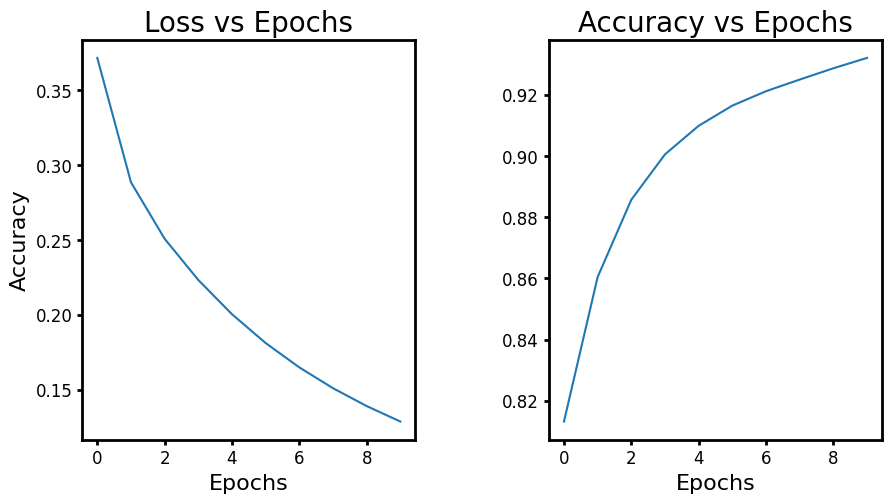

In [74]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
# Adjust figure and axes properties
fig.set_size_inches(10, 5)
ax1.spines[['top', 'bottom', 'left', 'right']].set_linewidth(2)
ax1.tick_params(width=2, labelsize=12)
ax2.spines[['top', 'bottom', 'left', 'right']].set_linewidth(2)
ax2.tick_params(width=2, labelsize=12)

# Give the plot title and axis labels
ax1.plot(losses)
ax1.set_title('Loss vs Epochs', fontsize=20)
ax1.set_xlabel('Epochs', fontsize=16)
ax1.set_ylabel('Loss', fontsize=16)
ax2.plot(accuracies)
ax2.set_title('Accuracy vs Epochs', fontsize=20)
ax2.set_xlabel('Epochs', fontsize=16)
ax1.set_ylabel('Accuracy', fontsize=16)

# Adjust the subplots to look nice
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
# Display the plot
plt.show()

#### Testing the model

In [76]:
testdata = WisconsinDataset(X_test, y_test)
testloader = DataLoader(testdata, batch_size=batch_size)

correct, total = 0, 0
# no need to calculate gradients when making predictions
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        # calculate output by running through the network
        outputs = clf(inputs)
        # get the predictions
        predicted = torch.round(outputs.data)
        # update results
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(f'Accuracy of the network on the {len(testdata)} test data: {100 * correct // total} %')

Accuracy of the network on the 114 test data: 98 %


### Autograd

Autograd is a feature of Pytorch that makes it flexible and fast for backpropagation based neural network learning. It allows for fast and easy computation of gradients (partial derivatives). We will illustrate some of the basic features of autograd in this section. 

Understanding how to enable and disable autograd is important. An example of this is when you want to finetune a pretrained model. You can add downstream layers to a pretrained model. To only train these layers, you can enable  autograd features to only compute the gradients and update the model weights of the downstream layers. 

#### Example

Consider the following sequence of operations:

```
a = torch.linspace(0., 2.*math.pi, steps=25, requires_grad=True)
b = torch.sin(a)
c = 2 * b
d = c + 1
out = d.sum()
```

In [ ]:
import math 

a = torch.linspace(0., 2.*math.pi, steps=25, requires_grad=True)
b = torch.sin(a)
c = 2 * b
d = c + 1
out = d.sum()

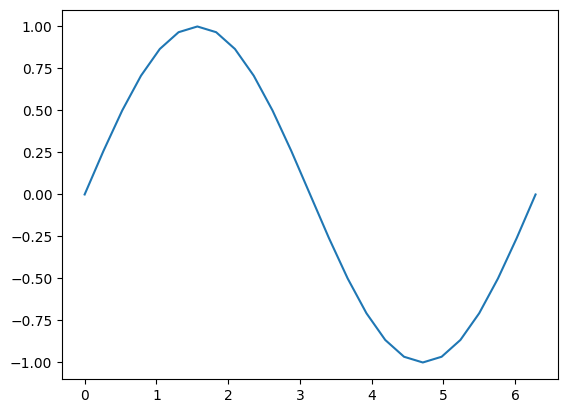

In [ ]:
plt.plot(a.detach(), b.detach())
plt.show()

In [ ]:
print(b)

print(c)

print(d)

print(out)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)
tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, 

In [ ]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x2bfe13280>, 0), (None, 0))
((<SinBackward0 object at 0x2bfe13310>, 0), (None, 0))
((<AccumulateGrad object at 0x2bfe132b0>, 0),)
()

c:

b:

a:
None


tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


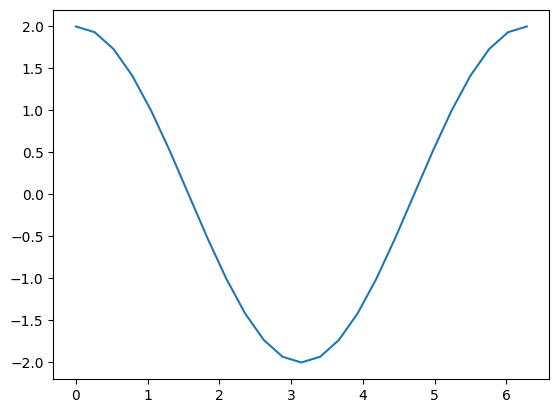

In [ ]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())
plt.show()

#### Disabling autograd

The way to disable a gradient being calculated is by setting the property `requires_grad = False`. To achieve this in a model you can adapt the following code:

```
for param in model.parameters():
    param.requires_grad = False
```